In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plts
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# import mysql.connector as sql
import sqlite3

from sqlalchemy import create_engine

In [2]:
clean_income_and_age = pd.read_csv('./CleanData/clean_annual_income_and_age.csv')
clean_income_and_age.head(3)

,Unnamed: 0,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married


#### Task
##### Figure Out Income Distribution by Age, Occupation, Gender and Location age MUST be between 15 and 85

In [3]:
clean_income_and_age.age.min(), clean_income_and_age.age.max()

(18.0, 64.0)

In [4]:
clean_income_and_age.annual_income.min(), clean_income_and_age.annual_income.max()

(5175.0, 449346.0)

In [5]:
pd.DataFrame(clean_income_and_age.columns)

,0
0,Unnamed: 0
1,cust_id
2,name
3,gender
4,age
5,location
6,occupation
7,annual_income
8,marital_status


In [6]:
clean_income_and_age.gender.value_counts(dropna=False)

Male      674
Female    326
Name: gender, dtype: int64

In [7]:
clean_income_and_age.occupation.value_counts(dropna=False)

Business Owner         289
Freelancer             228
Data Scientist         184
Fullstack Developer    148
Consultant              97
Artist                  38
Accountant              16
Name: occupation, dtype: int64

In [8]:
clean_income_and_age.location.value_counts(dropna=False)

City      683
Suburb    232
Rural      85
Name: location, dtype: int64

In [9]:
clean_income_and_age.marital_status.value_counts(dropna=False)

Married    775
Single     225
Name: marital_status, dtype: int64

In [10]:
annualincome_by_ms = clean_income_and_age.groupby('marital_status')['annual_income'].median().reset_index()
pd.DataFrame(annualincome_by_ms)

,marital_status,annual_income
0,Married,115498.0
1,Single,114178.0


In [11]:
annualincome_by_msSum = clean_income_and_age.groupby('marital_status')['annual_income'].sum().reset_index()
pd.DataFrame(annualincome_by_msSum)

,marital_status,annual_income
0,Married,108848222.5
1,Single,31635326.0


In [12]:
annualincome_by_ms = clean_income_and_age.groupby('marital_status')['annual_income'].mean().reset_index()
pd.DataFrame(annualincome_by_ms)

,marital_status,annual_income
0,Married,140449.319355
1,Single,140601.448889


In [13]:
annualincome_occup = clean_income_and_age.groupby('occupation')['annual_income','age'].mean().reset_index()
pd.DataFrame(annualincome_occup)

,occupation,annual_income,age
0,Accountant,64123.562500,31.812500
1,Artist,45309.236842,26.026316
2,Business Owner,268447.368512,49.501730
3,Consultant,60703.154639,45.484536
4,Data Scientist,137021.266304,32.173913
5,Freelancer,76327.508772,23.877193
6,Fullstack Developer,78727.972973,26.766892


In [14]:
annualincome_age = round(clean_income_and_age.groupby('occupation')['annual_income','age'].mean().reset_index(),1)
pd.DataFrame(annualincome_age)

,occupation,annual_income,age
0,Accountant,64123.6,31.8
1,Artist,45309.2,26.0
2,Business Owner,268447.4,49.5
3,Consultant,60703.2,45.5
4,Data Scientist,137021.3,32.2
5,Freelancer,76327.5,23.9
6,Fullstack Developer,78728.0,26.8


In [15]:
location_gender = clean_income_and_age.groupby('location')['gender'].count().reset_index()
pd.DataFrame(location_gender)

,location,gender
0,City,683
1,Rural,85
2,Suburb,232


In [16]:
location_gender2 = clean_income_and_age.groupby(['gender','location'])['location'].count()
pd.DataFrame(location_gender2)

location
gender location          
Female City           226
       Rural           26
       Suburb          74
Male   City           457
       Rural           59
       Suburb         158

In [17]:
annualincome_by_ms

,marital_status,annual_income
0,Married,140449.319355
1,Single,140601.448889


##### Visual Distribution

##### PIE CHART VISUALS FOR AGE GROUP

In [18]:
clean_income_and_age.head()

,Unnamed: 0,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [19]:
bin_edges = [17,25,48,65]
bin_labels = ['18-25(Young Adults)', '26-48 (Mid Adults)', '49-65 (Senior Adults)']
clean_income_and_age['Age_group'] = pd.cut(clean_income_and_age['age'], bins = bin_edges,labels=bin_labels)
clean_income_and_age.head(4)

,Unnamed: 0,cust_id,name,gender,age,location,occupation,annual_income,marital_status,Age_group
0,0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65 (Senior Adults)
1,1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48 (Mid Adults)
2,2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25(Young Adults)
3,3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25(Young Adults)


In [20]:
age_group_counts = clean_income_and_age.Age_group.value_counts(normalize=True) *100
age_group_counts

26-48 (Mid Adults)       56.7
18-25(Young Adults)      24.6
49-65 (Senior Adults)    18.7
Name: Age_group, dtype: float64

In [21]:
age_group_counts.index

CategoricalIndex(['26-48 (Mid Adults)', '18-25(Young Adults)',
                  '49-65 (Senior Adults)'],
                 categories=['18-25(Young Adults)', '26-48 (Mid Adults)', '49-65 (Senior Adults)'], ordered=True, dtype='category')

In [22]:
age_group_counts.values

array([56.7, 24.6, 18.7])

In [23]:
age_group_counts.index.values

['26-48 (Mid Adults)', '18-25(Young Adults)', '49-65 (Senior Adults)']
Categories (3, object): ['18-25(Young Adults)' < '26-48 (Mid Adults)' < '49-65 (Senior Adults)']

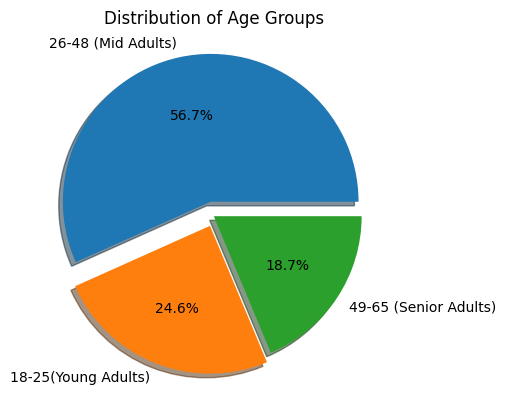

In [24]:
plt.pie(age_group_counts,labels = age_group_counts.index, 
        autopct='%1.1f%%', 
        shadow=True,
        explode=(0.1,0.07,0),)
plt.title('Distribution of Age Groups')
plt.show()

In [25]:
clean_income_and_age.gender.value_counts()

Male      674
Female    326
Name: gender, dtype: int64

In [26]:
clean_income_and_age.location.value_counts()

City      683
Suburb    232
Rural      85
Name: location, dtype: int64

In [27]:
clean_income_and_age.groupby(['location','gender']).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [28]:
clean_income_and_age.groupby(['location','gender']).size().unstack()

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


In [29]:
location_gender2 = clean_income_and_age.groupby(['location','gender'])['location'].count().unstack()
pd.DataFrame(location_gender2)

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


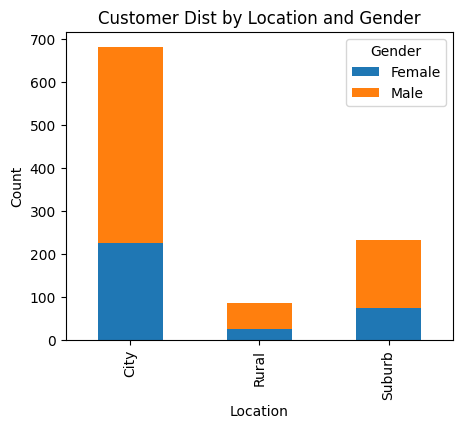

In [30]:
location_gender2.plot(kind='bar', stacked=True, figsize=(5,4))
plt.title('Customer Dist by Location and Gender')
plt.legend(title='Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

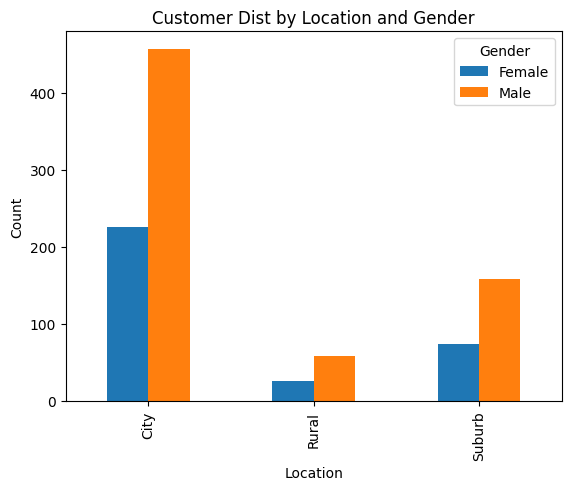

In [31]:
location_gender2.plot(kind='bar', stacked=False)
plt.title('Customer Dist by Location and Gender')
plt.legend(title='Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()